                                                             Ф.И.О.

#                                    Лабораторная работа №5

## Массивы Numpy

**1.** Сформировать одномерный массив, состоящий из n вещественных элементов co значением от -10 до 10.0. Для случайного числа y, такого, что *минимальный элемент массива < y < максимальный элемент массива*, вычислить:  
  
* произведение элементов массива, значения модуля которых больше модуля y,  
  
* сумму модулей остальных элементов.

In [1]:
import numpy as np
import random as rand

MAX_RAND = 10.0
MIN_RAND = -10

print("Введите размер массива:")
try:
    n = int(input())
except Exception as e:
    print("Input number", str(e))

digits = np.array([rand.uniform(MIN_RAND, MAX_RAND) for _ in range(n)])
print(digits)
y = np.random.uniform(digits.min(), digits.max())
print("y", y)
production = np.prod(digits[np.abs(digits) > np.abs(y)])
print("sum_rem", np.abs(digits[np.abs(digits) <= np.abs(y)]))
sum_remaining = np.sum(np.abs(digits[np.abs(digits) <= np.abs(y)]))
print("prod", production)
print("\nsum", sum_remaining)

Введите размер массива:
10
[-1.42002688  0.55631213 -3.75653528  0.78084004 -5.87707026  5.82937664
  2.22237872 -5.01852435 -3.41202851 -2.35833382]
y -5.839093049090066
sum_rem [1.42002688 0.55631213 3.75653528 0.78084004 5.82937664 2.22237872
 5.01852435 3.41202851 2.35833382]
prod -5.877070261847496

sum 25.354356384098317


**2.** Найти максимальный элемент в одномерном массиве x среди элементов, перед которыми стоит нулевой.

In [1]:
import numpy as np

X = np.array([9, 7, 0, 1, 2, 3, 4, 5, 0, 3, 4, 8, 0, 6, 0])

zero_indices = np.where(X[:-1] == 0)[0]

elements_after_zeros = X[zero_indices + 1]

max_element = np.max(elements_after_zeros)

print(f'Массив: {X}\n'
      f'Элементы, перед которыми стоит ноль: {elements_after_zeros}\n'
      f'Максимальный элемент среди них - {max_element}')

Массив: [9 7 0 1 2 3 4 5 0 3 4 8 0 6 0]
Элементы, перед которыми стоит ноль: [1 3 6]
Максимальный элемент среди них - 6


**3.** Дана целочисленная прямоугольная матрица. Определить: количество строк, не содержащих ни одного нулевого элемента, а также 
максимальное значение из чисел, встречающихся в заданной матрице более одного раза.

In [11]:
import numpy as np
import random as rand

MAX_RAND = 10
MIN_RAND = 0

matrix = np.array([rand.randint(MIN_RAND, MAX_RAND) for _ in range(10)])
print(matrix)

matrix = matrix.reshape(matrix.shape[0], 1)
print(matrix)
non_zero_rows = np.count_nonzero(matrix, axis=1)
count_non_zero = np.count_nonzero(non_zero_rows == matrix.shape[1])

unique_el, counts = np.unique(matrix, return_counts=True)
max_non_unique_el = unique_el[counts > 1].max()

print("Количество строк, которые не содержат нулевого элемента", count_non_zero)
print("Максимально значение, которое встречается более одного раза", max_non_unique_el)

[ 7  4 10  3  7  4  7  9  2  8]
[[ 7]
 [ 4]
 [10]
 [ 3]
 [ 7]
 [ 4]
 [ 7]
 [ 9]
 [ 2]
 [ 8]]
Количество строк, которые не содержат нулевого элемента 10
Максимально значение, которое встречается более одного раза 7


**4.** Элемент матрицы называется локальным минимумом, если он строго меньше всех имеющихся у него соседей. Соседями элемента А[i,j] в матрице назовем элементы А[k,l], где i-1<=k<=i+1, j-1 < l <j+1, (k, l) != (i, j).  
Подсчитать количество локальных минимумов заданной в файле input.txt матрицы размером 10 на 10.

**5.** Определите, является ли массив магическим квадратом (суммы по всем горизонталям, вертикалям и двум диагоналям равны).

In [11]:
import numpy as np


def is_magic_square(matrix):
    n = len(matrix)

    # Сумма элементов в первой строке (первая горизонталь)
    expected_sum = sum(matrix[0])

    # Проверка сумм по всем горизонталям
    for row in matrix:
        if sum(row) != expected_sum:
            return False

    # Проверка сумм по всем вертикалям
    for col in range(n):
        if sum(matrix[row][col] for row in range(n)) != expected_sum:
            return False

    # Проверка суммы по главной диагонали trace
    if sum(matrix[i][i] for i in range(n)) != expected_sum:
        return False

    # Проверка суммы по побочной диагонали
    if sum(matrix[i][n - 1 - i] for i in range(n)) != expected_sum:
        return False

    return True


magic_square = np.array([[2, 7, 6], [9, 5, 1], [4, 3, 8]])

if is_magic_square(magic_square):
    print("Это магический квадрат.")
else:
    print("Это не магический квадрат.")


Это магический квадрат.


**6.** Программным образом заполните массив одним из двух следующих способов. Размерность n и m, а также номер способа заполнения вводится пользователем при запуске программы.
Результат записать в файл.

In [5]:
import numpy as np

def fill_diagonal_array(rows, columns):
              array = np.zeros((rows, columns)).astype(int)
              number = 1

              flag = True # Направление (снизу-вверх или сверху-вниз)

              for i in range(rows + columns - 1):
                  if flag: # Заполняем диагональ снизу-вверх
                      row = min(i, rows - 1)
                      col = i - row
                      while row >= 0 and col < columns:
                          array[row][col] = number
                          number += 1
                          row -= 1
                          col += 1
                  else: # Заполняем диагональ сверху-вниз
                      col = min(i, columns - 1)
                      row = i - col
                      while col >= 0 and row < rows:
                          array[row][col] = number
                          number += 1
                          col -= 1
                          row += 1

                  flag = not flag  # Изменяем направление заполнения
                
              return array

def fill_spiral_array(rows, columns):
          array = np.zeros((rows, columns)).astype(int)

          top, bottom = 0, rows - 1 # Границы спирали
          left, right = 0, columns - 1

          number = 1 # Изначальное число

          while top <= bottom and left <= right:
              for i in range(left, right + 1):# Заполняем верхнюю границу слева направо
                  array[top][i] = number
                  number += 1
              top += 1

              for i in range(top, bottom + 1): # Заполняем правую границу сверху вниз
                  array[i][right] = number
                  number += 1
              right -= 1

              for i in range(right, left - 1, -1): # Заполняем нижнюю границу справа налево
                  array[bottom][i] = number
                  number += 1
              bottom -= 1

              for i in range(bottom, top - 1, -1): # Заполняем левую границу снизу вверх
                  array[i][left] = number
                  number += 1
              left += 1

          return array 
    
try:
  while True:
      print('Выберите способ заполнения матрицы:\n'
            '1. - Заполнение диагоналями\n'
            '2. - Заполнение спиралью\n'
            '3. - Выйти из программы\n')
      choice = int(input('Ваш выбор: '))

      if choice == 1:
          
          rows = int(input("Введите число строк: "))
          columns = int(input("Введите число столбцов: "))

          if (rows < 1 or columns < 1):
            print('Число строк/столбцов слишком маленькое для заполнения матрицы')
          else:
            array = fill_diagonal_array(rows, columns)
            print(array)

      if choice == 2:
          rows = int(input("Введите число строк: "))
          columns = int(input("Введите число столбцов: "))

          if (rows < 1 or columns < 1):
            print('Число строк/столбцов слишком маленькое для заполнения матрицы')
          else:
            array = fill_spiral_array(rows, columns)
            print(array)

      if choice ==3:
          break
except:
  print('Данные введены некорректно')

Выберите способ заполнения матрицы:
1. - Заполнение диагоналями
2. - Заполнение спиралью
3. - Выйти из программы

Ваш выбор: 2
Введите число строк: e
Данные введены некорректно


**7.** Удалите строку и столбец, на пересечении которых находится минимальный элемент массива. После этого отсортируйте столбцы массива по неубыванию минимальных элементов в них.

In [2]:
import numpy as np

array = np.array([[1, 20, 55, 10, 11, 21],
                  [0, 0, 92, 12, 20, 22],
                  [26, 8, 13, 19, 23, 0],
                  [17, 14, 18, 54, 29, 31],
                  [0, 0, 25, 28, 32, 35],
                  [16, 26, 27, 33, 34, 9]])

min_el = np.min(array)
min_indexes = np.where(array == min_el)
min_ind_s = list(set(min_indexes[0]))
min_ind_r = list(set(min_indexes[1]))

print("min coord", min_indexes[0], min_indexes[1])
print("уникальные координаты",min_ind_s, min_ind_r)
print("min el", array[min_ind_s[0]][min_ind_r[0]])

print("Матрица до удаления\n", array)
array = np.delete(array, min_indexes[0], axis=0)
array = np.delete(array, min_indexes[1], axis=1)
print(" Матрица после удаления\n", array)

if array.size > 1:
    sorted_indexes = np.argsort(np.min(array, axis=0))
    sorted_arr = array[:, sorted_indexes]
    
    print(" Матрица после сортировки\n", sorted_arr)
else:
    print("Сортировка невозможна, потому что в матрице не осталось элементов")

min coord [1 1 2 4 4] [0 1 5 0 1]
уникальные координаты [1, 2, 4] [0, 1, 5]
min el 0
Матрица до удаления
 [[ 1 20 55 10 11 21]
 [ 0  0 92 12 20 22]
 [26  8 13 19 23  0]
 [17 14 18 54 29 31]
 [ 0  0 25 28 32 35]
 [16 26 27 33 34  9]]
 Матрица после удаления
 [[55 10 11]
 [18 54 29]
 [27 33 34]]
 Матрица после сортировки
 [[10 11 55]
 [54 29 18]
 [33 34 27]]


## Обработка исключений. Библиотека Matplotlib

**8.**	Реализовать проверку числа 35742549198872617291353508656626642567 на простоту последовательным перебором возможных делителей (не нужен эффективный алгоритм). Выполнить замер времени работы кода без обработки исключений и с ней. Можно проводить тестирование на числе 2147483647 или 11111111111111111111111.

In [24]:
import time


def is_prime(n):
    if n <= 1:
        return
    for i in range(2, n):
        if n % i == 0:
            return False
    return True


number = 2147483647

start_t = time.time()
result = is_prime(number)
end_t = time.time()

print(f"Число {number} {'простое' if result else 'не простое'}")
print(f"Время выполнения без обработки исключений: {end_t - start_t} секунд")


Число 2147483647 простое
Время выполнения без обработки исключений: 438.0150730609894 секунд


In [6]:
import time


def is_prime(n):
    if n <= 1:
        return
    try:
        for i in range(2, n):
            if n % i == 0:
                return False
    except ZeroDivisionError:
        return False
    return True


number = 2147483647

start_t = time.time()
result = is_prime(number)
end_t = time.time()

print(f"Число {number} {'простое' if result else 'не простое'}")
print(f"Время выполнения c обработкой исключений: {end_t - start_t} секунд")

Число 2147483647 простое
Время выполнения c обработкой исключений: 452.7401466369629 секунд


**9.**	В каталоге texts сохранить не менее 10 произвольных текстов объемом не менее 500 слов.  Пользователь программным образом выбирает текст. Программа строит график частоты для 50 наиболее частотных слов текста. 

**10.**	Считать данные из текстового документа, в котором написано годовое количество осадков:

*Январь 15*

*Февраль 20*

…

*Декабрь 18*


Вывести их в форме диаграмм: обычная, горизонтальная, круговая (все виды диаграмм должны быть на одном рисунке). Сохранить получившийся рисунок в файл.


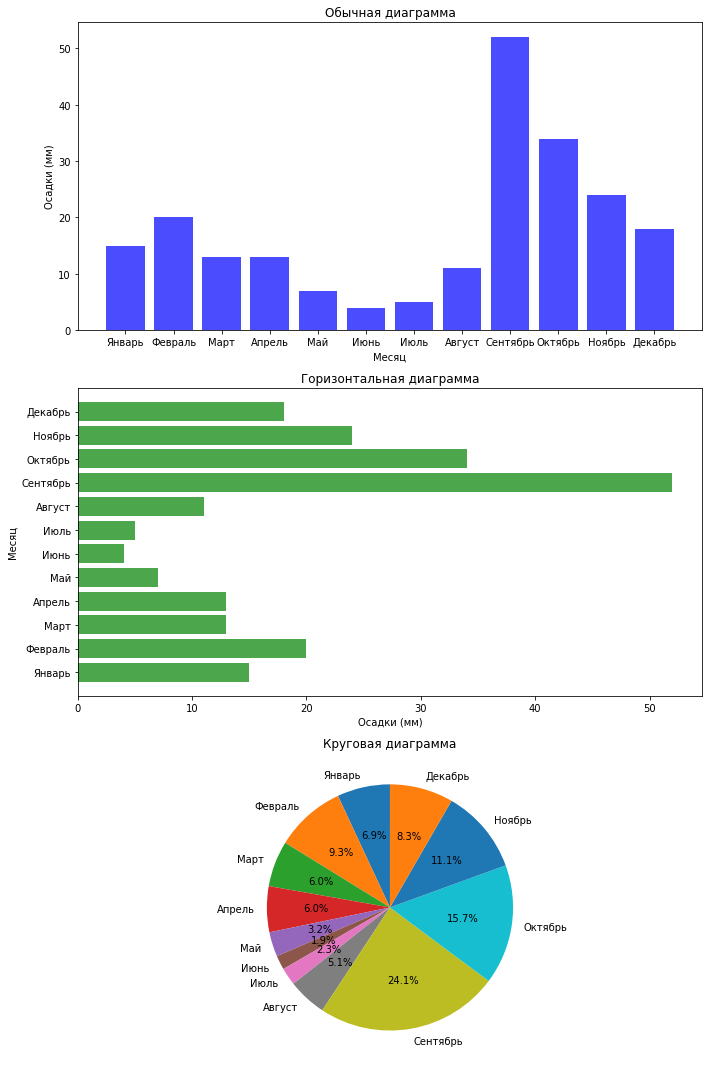

In [21]:
import matplotlib.pyplot as plt
import numpy as np

months = []
rainfall = []

with open('rainfall.txt', 'r', errors='replace', encoding="UTF-8") as f:
    lines = f.readlines()
    for line in lines:
        current = line.split()
        if len(current) == 2:
            months.append(current[0])
            rainfall.append(int(current[1]))

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Обычная диаграмма
axs[0].bar(months, rainfall, color='b', alpha=0.7)
axs[0].set_title('Обычная диаграмма')
axs[0].set_xlabel('Месяц')
axs[0].set_ylabel('Осадки (мм)')

# Горизонтальная диаграмма
axs[1].barh(months, rainfall, color='g', alpha=0.7)
axs[1].set_title('Горизонтальная диаграмма')
axs[1].set_xlabel('Осадки (мм)')
axs[1].set_ylabel('Месяц')

# Круговая диаграмма
axs[2].pie(rainfall, labels=months, autopct='%1.1f%%', startangle=90)
axs[2].set_title('Круговая диаграмма')

plt.tight_layout()
plt.savefig('diagrams.png')

plt.show()

**11.** Нарисовать звёздочками зелёного цвета график кардиоиды в полярной системе координат. Добавьте легенду с заголовком «Функция» и подписью «Кардиоида» в левый верхний угол.
Угол принадлежит промежутку от 0 до 3π/2, r = 2,5. Уравнение кардиоиды: ρ = 2*r*(1 + cosφ).



In [ ]:
phi = np.arange(0.3)

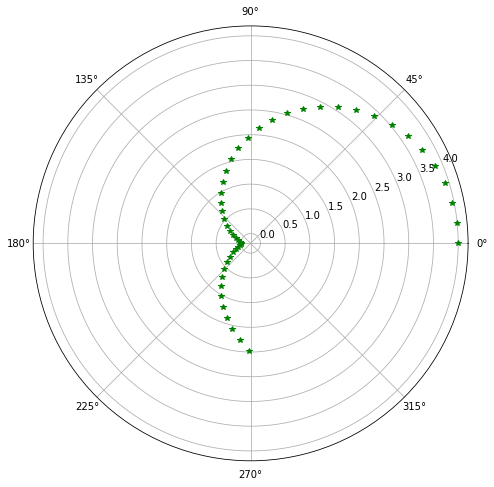

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Угол от 0 до 3π/2
theta = np.linspace(0, 3 * np.pi / 2, 50)

rho = 2.5 * (1 + np.cos(theta))

plt.figure(figsize=(8, 8))

phi = np.arange(0, 3 * np.pi / 2, 0.1)
r = 1

plt.polar(phi, 2 * r * (1 + np.cos(phi)), marker='*', linestyle='None', color='g')
#plt.scatter(x, y, color='green', marker='*', label='Кардиоида')

#plt.legend(title='Функция')

#plt.axis('equal')
#plt.xlabel('X')
#plt.ylabel('Y')

plt.show()


**12.** Написать программу изображения графика функции y=√x. Не забывайте про то, что функция имеет значения ≥ 0. Предварительно программа запрашивает у пользователя следующую информацию:

* цвет графика (программа предлагает не менее пяти различных цветов);
* тип линии (программа предлагает не менее трех различных вариантов);
* толщину линии (программа предлагает не менее пяти различных вариантов).

Все запросы к пользователю обрабатываются с использованием обработки исключительных ситуаций. Варианты можно вводить строкой или числом (на ваш выбор).


Выберите цвет графика (red, green, blue, cyan, magenta): blue
Выберите тип линии (solid, dashed, dashdot, dotted): dashed
Выберите толщину линии (0.5, 1.0, 1.5, 2.0, 2.5): bbb
Неправильный ввод
Выберите толщину линии (0.5, 1.0, 1.5, 2.0, 2.5): 1,5
Неправильный ввод
Выберите толщину линии (0.5, 1.0, 1.5, 2.0, 2.5): 1.5


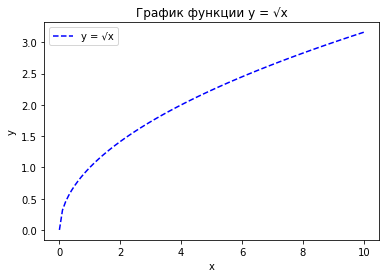

In [4]:
import matplotlib.pyplot as plt
import numpy as np


def plot_sqrt_function(color, linestyle, linewidth):
    x = np.linspace(0, 10, 100)

    y = np.sqrt(x)

    plt.plot(x, y, color=color, linestyle=linestyle, linewidth=linewidth, label='y = √x')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('График функции y = √x')
    plt.legend()

    plt.show()


try:
    color = ""
    linewidth = 0.0
    lisestyle = ""

    while True:
        color = input("Выберите цвет графика (red, green, blue, cyan, magenta): ").lower()
        if color not in ['red', 'green', 'blue', 'cyan', 'magenta']:
            print("Недопустимый цвет")
        else:
            break
    while True:
        linestyle = input("Выберите тип линии (solid, dashed, dashdot, dotted): ").lower()
        if linestyle not in ['solid', 'dashed', 'dashdot', 'dotted']:
            print("Недопустимый тип линии")
        else:
            break

    while True:
        try:
            linewidth = float(input("Выберите толщину линии (0.5, 1.0, 1.5, 2.0, 2.5): "))
            if linewidth not in [0.5, 1.0, 1.5, 2.0, 2.5]:
                print("Недопустимая толщина линии")
            else:
                break
        except:
            print("Неправильный ввод")

    plot_sqrt_function(color, linestyle, linewidth)

except ValueError as e:
    print(f"Ошибка: {e}. Пожалуйста, введите допустимые значения.")
except Exception as e:
    print(f"Произошла ошибка: {e}")
